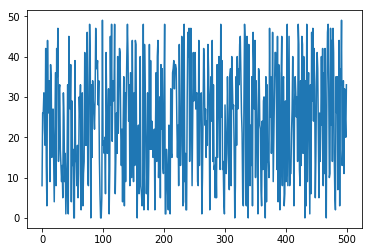

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(0,50,500)
plt.plot(data)

In [22]:
alerts = list(filter(lambda v: v>40, data))

print("Alerts {}".format(len(alerts)))
    

Alerts 75


In [23]:
alerts2 = []
for i in range(1,len(data)):
    if data[i] >= 40 and data[i-1] >= 40:
        alerts2.append("Alert")
        
print(len(alerts2))


16


In [33]:
import pandas as pd
occupancy = pd.read_csv("~/Downloads/occupancy.csv")
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.head()
occupancy.shape

(2664, 7)

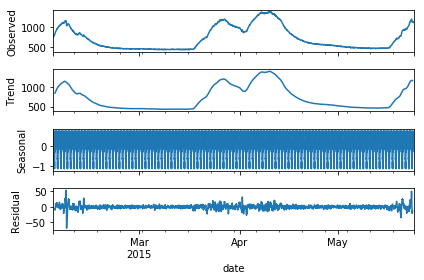

In [31]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(occupancy.CO2)
resplot = res.plot()

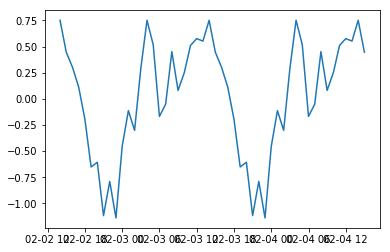

In [38]:
plt.plot(res.seasonal[:50])
# y = mx + c
# y' = m

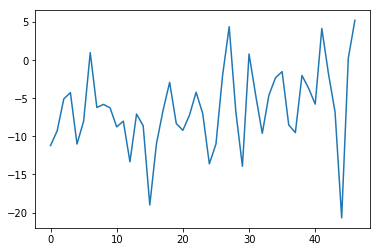

In [69]:
fivedays = list(occupancy.CO2[:48])
fivedays_minusone =  np.asarray(fivedays[1:] + [fivedays[0]])
diff = fivedays - fivedays_minusone
#print(diff)
#plt.plot(fivedays)
plt.plot(diff[:-1])

In [116]:
from statsmodels.tsa.ar_model import AR

train = occupancy.CO2[:-10]
test = occupancy.CO2[-10:]

print(len(train), len(test))

model = AR(occupancy.CO2)
model_fit = model.fit(maxlag=4)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

errors = pd.DataFrame([test, predictions]).T
errors.columns = ["AR", "Real"]
errors["diff_AR"] = errors["Real"]-errors["AR"]
errors


2654 10


AR         Real    diff_AR
date                                                    
2015-05-24 04:00:00  1153.250000  1154.058886   0.808886
2015-05-24 05:00:00  1152.400000  1154.067760   1.667760
2015-05-24 06:00:00  1146.166667  1152.703533   6.536866
2015-05-24 07:00:00  1145.400000  1144.801574  -0.598426
2015-05-24 08:00:00  1140.800000  1145.074850   4.274850
2015-05-24 09:00:00  1150.250000  1138.895624 -11.354376
2015-05-24 10:00:00  1129.200000  1152.445847  23.245847
2015-05-24 11:00:00  1125.800000  1123.655071  -2.144929
2015-05-24 12:00:00  1123.000000  1126.009630   3.009630
2015-05-24 13:00:00  1124.000000  1119.506640  -4.493360

In [121]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy.CO2, order=(4, 5))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(occupancy.CO2)-10, len(occupancy.CO2))


In [122]:
errors["ARMA"] = predictions
errors["diff_ARMA"] = errors["Real"]-errors["ARMA"]
errors


AR         Real    diff_AR         ARMA  \
date                                                                    
2015-05-24 04:00:00  1153.250000  1154.058886   0.808886  1152.842929   
2015-05-24 05:00:00  1152.400000  1154.067760   1.667760  1153.729599   
2015-05-24 06:00:00  1146.166667  1152.703533   6.536866  1151.990167   
2015-05-24 07:00:00  1145.400000  1144.801574  -0.598426  1145.829605   
2015-05-24 08:00:00  1140.800000  1145.074850   4.274850  1146.167002   
2015-05-24 09:00:00  1150.250000  1138.895624 -11.354376  1139.750821   
2015-05-24 10:00:00  1129.200000  1152.445847  23.245847  1151.697812   
2015-05-24 11:00:00  1125.800000  1123.655071  -2.144929  1125.376990   
2015-05-24 12:00:00  1123.000000  1126.009630   3.009630  1126.047685   
2015-05-24 13:00:00  1124.000000  1119.506640  -4.493360  1122.373834   

                     diff_ARMA  
date                            
2015-05-24 04:00:00   1.215957  
2015-05-24 05:00:00   0.338161  
2015-05-24 06:00:00   0.713366  
2015-05-24 07:00:00  -1.028032  
2015-05-24 08:00:00  -1.092152  
2015-05-24 09:00:00  -0.855196  
2015-05-24 10:00:00   0.748034  
2015-05-24 11:00:00  -1.721920  
2015-05-24 12:00:00  -0.038055  
2015-05-24 13:00:00  -2.867193

In [126]:
RSquaresARMA = (errors["diff_ARMA"] * errors["diff_ARMA"]).sum()
RSquaresAR = (errors["diff_AR"] * errors["diff_AR"]).sum()
print("ARMA R^2 -> {:.2f} - AR R^2 -> {:.2f}".format(RSquaresARMA, RSquaresAR ))

ARMA R^2 -> 16.83 - AR R^2 -> 767.94
